In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV


In [4]:
data=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Copper Project\\daily_offers.xlsx - Result 1.csv")


In [5]:
df=data.copy()

In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
#material_ref has many null values , lets treat them first by replacing NaN to the null value

material_null=df['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
df['material_ref'][replace_null]=np.NaN

In [8]:
df['material_ref'].isnull().sum()

100645

In [9]:
#replcing Nan value in material_ref by mode value of that column
df['material_ref'].fillna(df['material_ref'].mode()[0],inplace=True)
df['material_ref'].isnull().sum()

0

In [10]:
df.isnull().sum().sum()

61

In [11]:
#treating Null values with mean mediun mode values accordingly 


df['customer'].fillna(df['customer'].mean(), inplace = True)
df['country'].fillna(df['country'].mean(), inplace = True)
df['application'].fillna(df['application'].mean(), inplace = True)
df['selling_price'].fillna(df['selling_price'].mean(), inplace = True)
df['delivery date'].fillna(df['delivery date'].mean(), inplace = True)

df['status'].fillna(df['status'].mode()[0], inplace = True)
df['item_date'].fillna(df['item_date'].mode()[0], inplace = True)

df['thickness'].fillna(df['thickness'].median(), inplace = True)

In [12]:
df.isnull().sum().sum()

2

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [16]:
df.nunique()

id               181671
item_date           252
quantity tons    181671
customer           1170
country              18
status                9
item type             7
application          31
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        29
selling_price      9796
dtype: int64

In [17]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [18]:
#converting quantity value to numeric float type
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [19]:
#categorical variables
categorical_col=['status','item type','material_ref','product_ref']
#continuous variable
Continues_col = ['quantity tons','customer','country','application','thickness','width','selling_price']


In [20]:
for i in Continues_col:
    print(i,"--",df[i].skew())

quantity tons -- 424.6873099371783
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness -- 303.4460810163655
width -- 0.37458349935712015
selling_price -- 301.3864288924798


In [21]:
def outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    low_r=(q1-1.5*IQR)
    high_r=(q3+1.5*IQR)
    outliers = df[((df<(low_r)) | (df>(high_r)))]
    return outliers,low_r,high_r



In [22]:
qt_outlier,qt_low,qt_high=outliers_IQR(df['quantity tons'])

app_outliers,app_low,app_upper=outliers_IQR(df['application'])

thickness_outliers,thickness_low,thickness_upper=outliers_IQR(df['thickness'])

width_outliers,width_low,width_upper=outliers_IQR(df['width'])

selling_outliers,selling_low,selling_upper=outliers_IQR(df['selling_price'])

In [23]:
min(selling_outliers),max(selling_outliers)

(-1160.0, 100001015.0)

In [24]:
df['selling_price_out']=df['selling_price']
df['selling_price_out'] = np.where(df['selling_price_out'] >selling_upper, selling_upper,df['selling_price_out'])
df['selling_price_out'] = np.where(df['selling_price_out'] <selling_low, selling_low,df['selling_price_out'])


In [25]:
df['selling_price_out'].skew()

0.13659230260245983

In [26]:
df['quantity tons_log']=np.log(df['quantity tons'])

df['thickness_log'] = np.log(df['thickness'])

In [27]:
df['quantity tons_log'].skew(),df['thickness_log'].skew()

(-0.06878249132733075, 0.3514353999155478)

In [28]:
df.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_out,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.0,854.0,3.991779,0.693147


In [29]:
Continues_col_out = ['quantity tons_log','customer','country','application','thickness_log','width','selling_price_out']


In [30]:
for i in Continues_col_out:
    print(i,"--",df[i].skew())

quantity tons_log -- -0.06878249132733075
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness_log -- 0.3514353999155478
width -- 0.37458349935712015
selling_price_out -- 0.13659230260245983


<AxesSubplot:xlabel='quantity tons'>

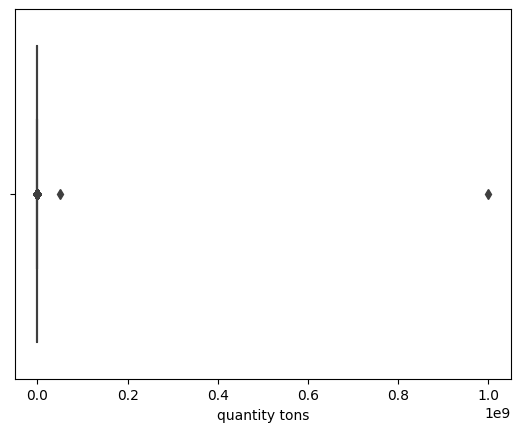

In [31]:
sns.boxplot(x=df['quantity tons'])

<AxesSubplot:xlabel='quantity tons_log'>

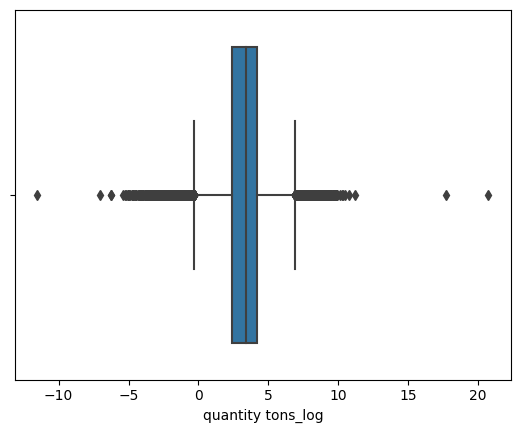

In [32]:
sns.boxplot(x=df['quantity tons_log'])

In [33]:
cols_plot=['quantity tons','quantity tons_log',
       'thickness','thickness_log','selling_price','selling_price_out']

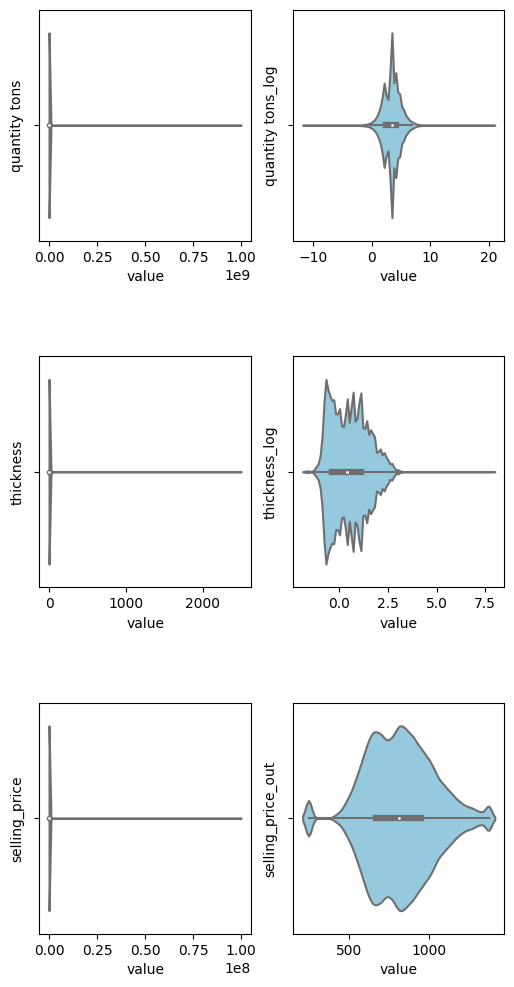

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 640x480 with 0 Axes>

In [34]:
# Select the features for the violin plot
fig, ax = plt.subplots((len(cols_plot)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols_plot):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
#sns.violinplot(data=df, x='selling_price_out', ax=ax[-1], color='skyblue')
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")

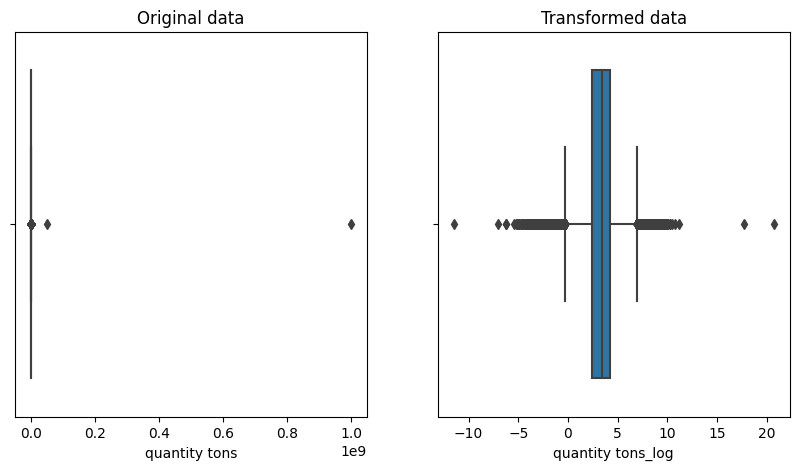

In [35]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['quantity tons'], ax=ax[0])
sns.boxplot(df['quantity tons_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()



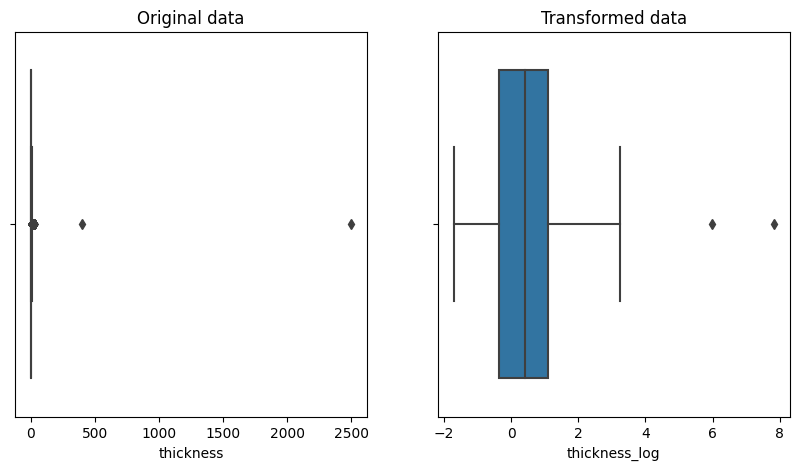

In [36]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['thickness'], ax=ax[0])
sns.boxplot(df['thickness_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

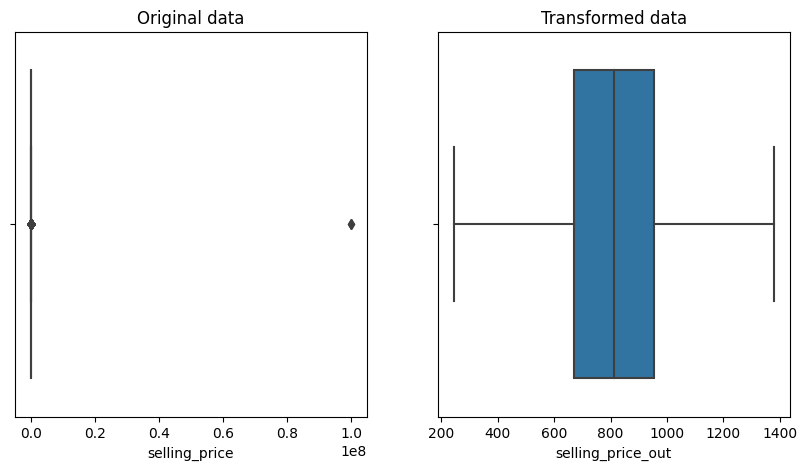

In [37]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['selling_price'], ax=ax[0])
sns.boxplot(df['selling_price_out'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()


<AxesSubplot:xlabel='thickness_log', ylabel='Density'>

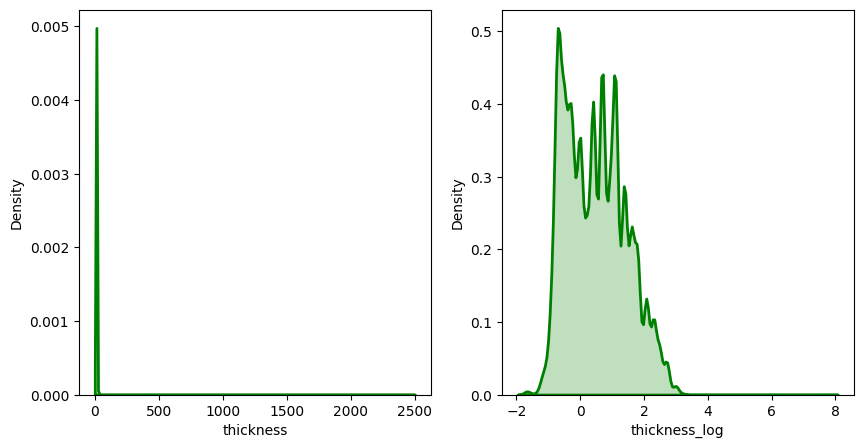

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['thickness'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['thickness_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<AxesSubplot:xlabel='quantity tons_log', ylabel='Density'>

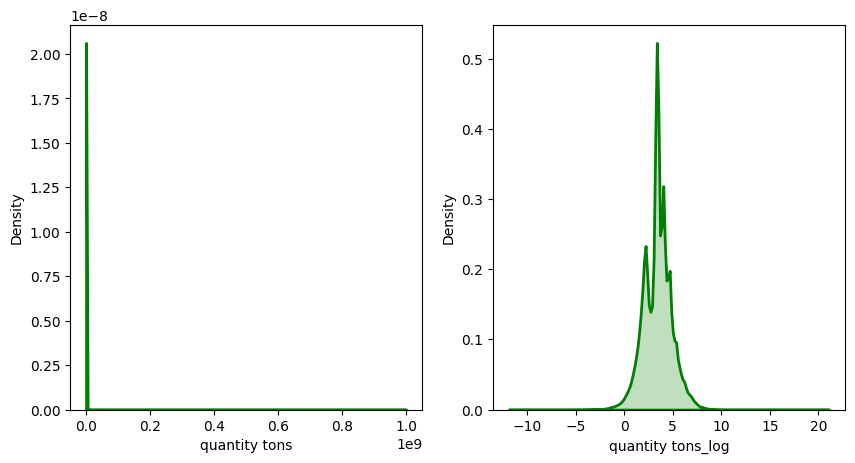

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['quantity tons'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['quantity tons_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<AxesSubplot:xlabel='selling_price_out', ylabel='Density'>

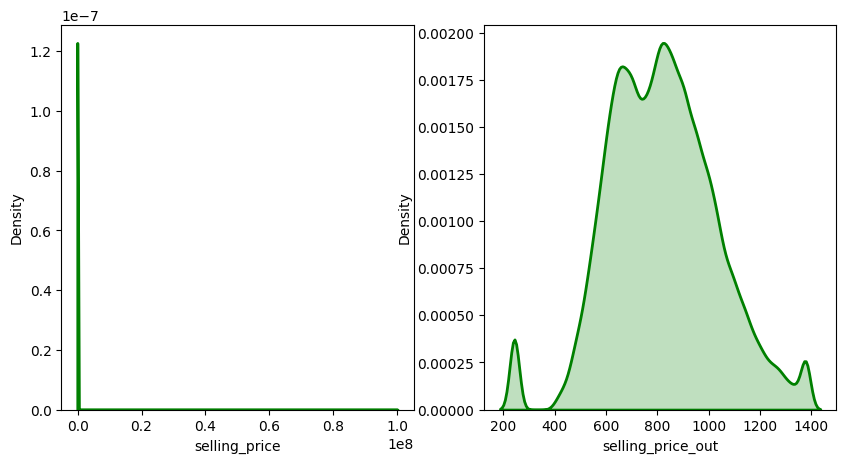

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['selling_price_out'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<AxesSubplot:>

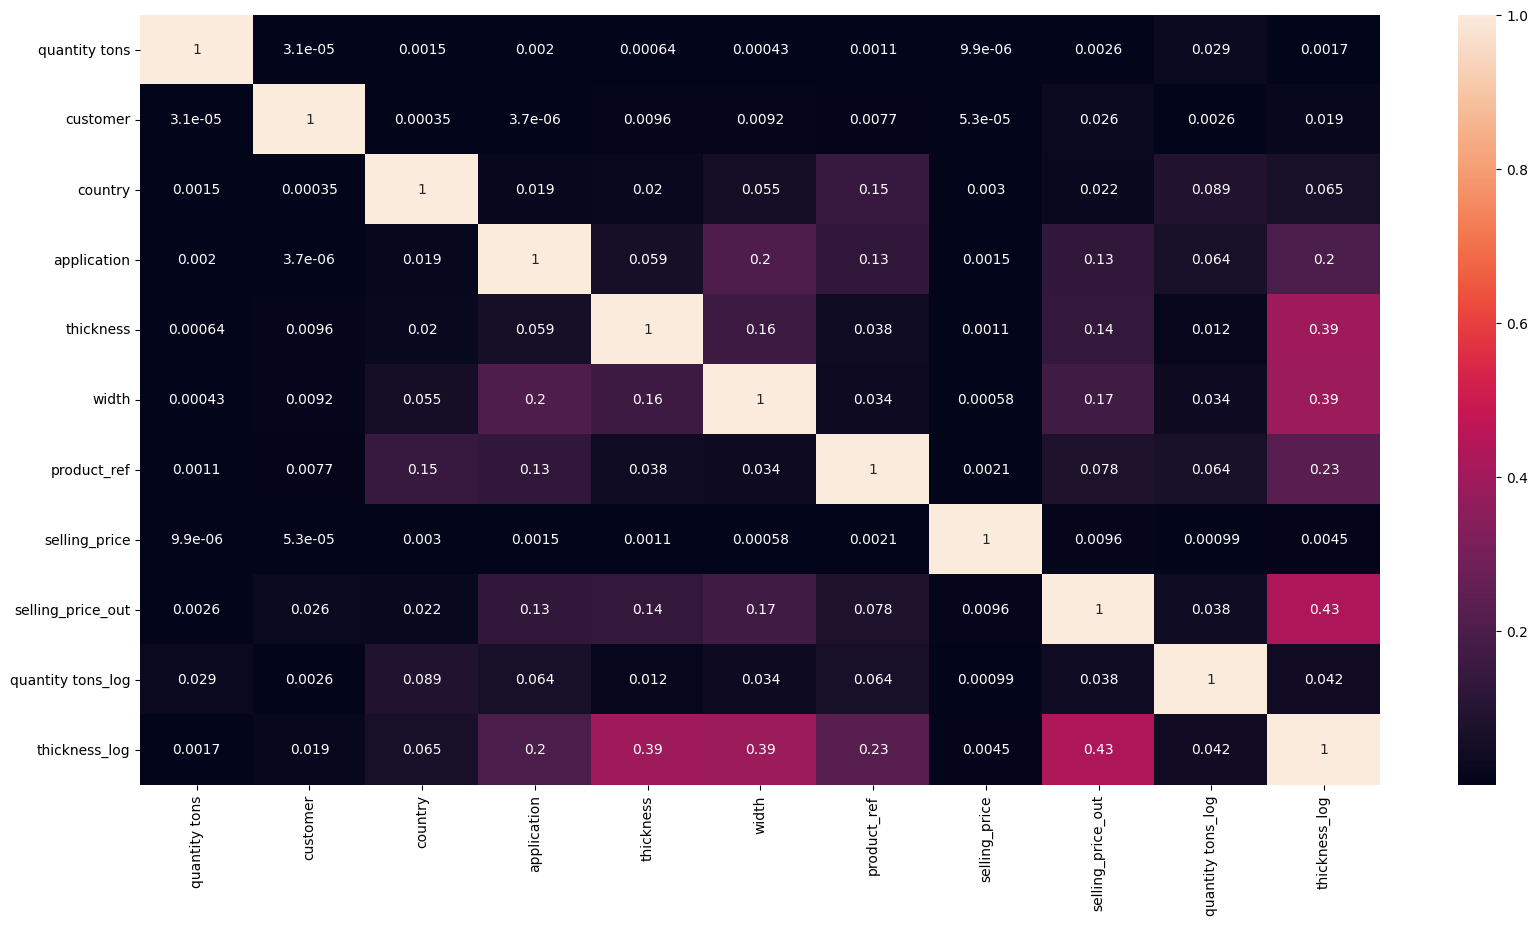

In [41]:
#HEATMAP FOR CORRELATION BETWEEN VARIABLES

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [42]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_out',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [43]:
df.isnull().sum()

id                   0
item_date            0
quantity tons        1
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_out    0
quantity tons_log    5
thickness_log        0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['item type']])
X_ohe = ohe.fit_transform(df[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(df[['status']])
X_be = ohe2.fit_transform(df[['status']]).toarray()

In [47]:
min(df['quantity tons']),max(df['quantity tons'])

(1e-05, 1000000000.0)

In [46]:
# independent features after encoding
X = np.concatenate((df[['quantity tons_log', 
                       'application', 
                       'thickness_log', 
                       'width','country',
                       'customer',
                       'product_ref']].values, X_ohe, X_be), axis=1)

y=df['selling_price_out']

In [110]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [111]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [113]:
# Building the model
extra_tree_model = ExtraTreesRegressor()

In [114]:
#training the model
et=extra_tree_model.fit(X_train, y_train)
#evaluting model
predict_val=extra_tree_model.predict(X_test)

In [115]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,predict_val)
MSE=mean_squared_error(y_test,predict_val)
r2 = r2_score(y_test,predict_val)

print("MAE :",MAE,"\nMSE :",MSE,"\nR2 :",r2)

MAE : 85.25884522852792 
MSE : 14754.929715149994 
R2 : 0.6637040725611687


In [118]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [119]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [120]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 12660.038131375943
R-squared: 0.7114510643564417


In [122]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [150]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(10), 10, np.log(240), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', (new_pred))

Predicted selling price: [744.16935561]


In [170]:
df_c = df[df['status'].isin(['Won', 'Lost'])]
df_class=df_c[[ 'customer','country',
               'item type','application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']]
Y=df_c['status']

In [177]:
len(Y)

150445

In [172]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_class[['item type']])
X_ohe = ohe.fit_transform(df_class[['item type']]).toarray()


In [173]:
be = LabelBinarizer()
be.fit(Y) 
Y_fit = be.fit_transform(Y)


In [175]:
# independent features after encoding
X = np.concatenate((df_class[[ 'customer','country',
               'application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_fit, test_size=0.2, random_state=42)


In [179]:
# Building the model
extra_tree_model_class = ExtraTreesClassifier()

In [180]:
extra_tree_model_class.fit(X_train, y_train)

ExtraTreesClassifier()

In [181]:
y_pred = extra_tree_model_class.predict(X_test)

In [184]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9307055734653861
Confusion Matrix:
[[ 5752  1170]
 [  915 22252]]


In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6922
           1       0.95      0.96      0.96     23167

    accuracy                           0.93     30089
   macro avg       0.91      0.90      0.90     30089
weighted avg       0.93      0.93      0.93     30089



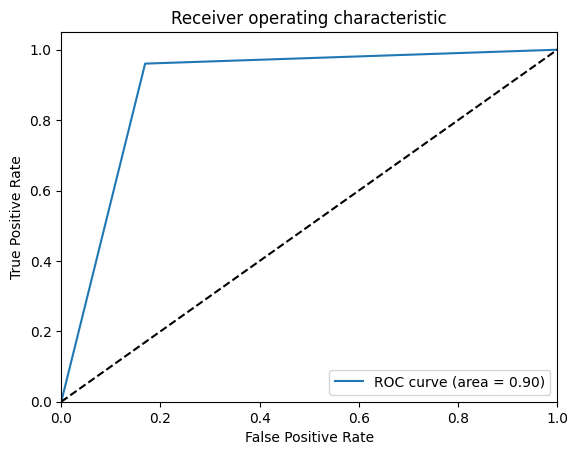

In [188]:

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [190]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(extra_tree_model_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [205]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[customer, country, application, width,product_ref,selling_price_out,quantity_tons_log,thickness_log,status]])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = extra_tree_model_class.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [203]:
customer=30202938
country=28.0
application =10.0
width =1500
product_ref = 1670798778
selling_price_out =956
quantity_tons_log =np.log(700)
thickness_log =np.log(2)
status='W'

In [ ]:
[ 'customer','country',
               'application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']].values, X_ohe